# RQ3: How does the size of Docker images evolve?

## Load data and import libraries

In [1]:
%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from pandas import Timestamp
import datetime
import re

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
data_folder = '../data/'

docker_image_dataset = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
dockerfiles = docker_image_dataset[docker_image_dataset['collection_method'].notnull()].copy()
dockerfiles.index=range(0,dockerfiles.shape[0])

## Define helper functions and defaults

In [3]:
!mkdir figs
figs_dir = 'figs/'

In [4]:
from cycler import cycler
def set_plt_rc():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    
    font = {'family': 'serif','size': BIGGER_SIZE}
    plt.rc('font', **font)

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('text', usetex=True) # enable latex       
    plt.rc('axes', prop_cycle=(cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                                         '#bcbd22', '#17becf']) +
                           cycler(linestyle=['-', '--', ':', '-.','-', '--', ':', '-.','-', '--'])))
    
set_plt_rc()

## Docker Image Source Repository Size Distribution

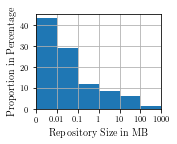

In [5]:
size=dockerfiles['repo_size'].dropna()
size[size==size.max()]=np.nan
size=size.dropna() # Remove outliers
log_size=size.apply(lambda x: np.log10(x/1024.0) if x>10 else np.log10(5.0/1024.0))
fig=plt.figure(figsize=(2.5,2))
ax=plt.subplot(111)
ax.set_xlim(-3,3)
plt.hist(log_size, weights=np.ones_like(log_size) * 100. / len(log_size),align='mid',bins=range(-3,4))
ax.grid()
xmajorLocator= ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(xmajorLocator)
ax.set_xlabel('Repository Size in MB')
ax.set_ylabel('Proportion in Percentage')
xi=['','0','$0.01$','$0.1$','$1$','$10$','$100$','$1000$']
ax.set_xticklabels(xi)
fig.tight_layout()
fig.savefig(figs_dir+'repo-size-distribution', dpi=300)
fig.savefig(figs_dir+'repo-size-distribution.pdf')

In [6]:
print('Averge Docker image source repository size in KB: ',size.mean())
print('Averge Docker image source repository size in MB: ',size.mean()/1024.0)
print('Median of Docker image source repository size in KB: ',size.median())
print('25% quantile of Docker image source repository size in KB: ', size.quantile(.25))
print('75% quantile of Docker image source repository size in KB: ', size.quantile(.75))

Averge Docker image source repository size in KB:  6669.048389226846
Averge Docker image source repository size in MB:  6.512742567604342
Median of Docker image source repository size in KB:  16.0
25% quantile of Docker image source repository size in KB:  4.0
75% quantile of Docker image source repository size in KB:  148.0


In [7]:
# Function for converting str into int list
def str2intlist(s):
    try:
        s=s[1:-1]
        s=s.split(',')
        for i in range(len(s)):
            s[i]=int(s[i])
        return s
    except:
        return np.nan
dockerfiles['avg_image_size']=np.nan
dockerfiles['avg_image_size']=dockerfiles['image_size'].apply(lambda x: np.mean(str2intlist(x))/1024.0/1024.0)

In [8]:
print('Averge Docker image size in MB: ',dockerfiles['avg_image_size'].dropna().mean())
print('Median of Docker image size in MB: ',dockerfiles['avg_image_size'].dropna().median())
print('25% quantile of Docker image size in MB: ', dockerfiles['avg_image_size'].dropna().quantile(.25))
print('75% quantile of Docker image size in MB: ', dockerfiles['avg_image_size'].dropna().quantile(.75))

Averge Docker image size in MB:  286.71456326453364
Median of Docker image size in MB:  152.68830943107605
25% quantile of Docker image size in MB:  47.26151132583618
75% quantile of Docker image size in MB:  308.6166989803314


## Docker Image Size Distribution

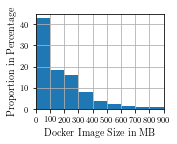

In [9]:
dockerfiles = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
dockerfiles['avg_image_size']=np.nan
dockerfiles['avg_image_size']=dockerfiles['image_size'].apply(lambda x: np.mean(str2intlist(x))/1024.0/1024.0)
size=dockerfiles['avg_image_size'].apply(lambda x: np.nan if x==0 else x)
size=size.dropna()
fig=plt.figure(figsize=(2.5,2))
ax=plt.subplot(111)
ax.set_xlim(0,900)
ax.grid()
ax.set_ylabel("Proportion in Percentage")
ax.set_xlabel('Docker Image Size in MB')
xmajorLocator= ticker.MultipleLocator(100)
ax.xaxis.set_major_locator(xmajorLocator)
plt.hist(size, weights=np.ones_like(size) * 100. / len(size),align='mid',bins=range(0,1000,100))
fig.tight_layout()
fig.savefig(figs_dir+'imge-size-distribution', dpi=300)
fig.savefig(figs_dir+'imge-size-distribution.pdf')

## Docker Image Size over Time

In [10]:
docker_image_dataset = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
dockerfiles = docker_image_dataset[docker_image_dataset['collection_method'].notnull()].copy()
dockerfiles.index=range(0,dockerfiles.shape[0])
dockerfiles['avg_image_size']=dockerfiles['image_size'].apply(lambda x: np.mean(str2intlist(x))/1024.0/1024.0)
update_year=pd.DatetimeIndex(dockerfiles['updated_at']).year
update_month=pd.DatetimeIndex(dockerfiles['updated_at']).month
dockerfiles['update_year']=update_year
dockerfiles['update_month']=update_month
year_list=range(2014,2020)
month_list=range(1,13)
time=pd.Series()
average_image_size=pd.Series()
for year in year_list:
    for month in month_list:
        if(year==2019 and month==4):
            break
        time=time.append(pd.Series(str(year)+'-'+str(month),index=[0]))
        dockerfile=dockerfiles[dockerfiles['update_year']==year]
        dockerfile=dockerfile[dockerfile['update_month']==month]
        size=dockerfile['avg_image_size']
        size=size.apply(lambda x: x if x!=0 else np.nan)
        size=size.dropna()
        average_image_size=average_image_size.append(pd.Series(size.mean(),index=[0]))
time.index=range(0,len(time))
average_image_size.index=range(0,len(average_image_size))
avg_size_over_time=pd.concat([time,average_image_size],axis=1,keys=['time','average_image_size'])

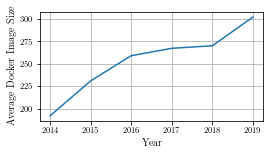

In [11]:
avg_size_over_time['time']=avg_size_over_time['time'].apply(lambda x:pd.Timestamp(x).year)
year=pd.Series(range(2014,2020))
avg_size=pd.Series([0]*len(year))
avg_size_yearly=pd.concat([year,avg_size],axis=1,keys=['Year','Size'])
for y in range(2014,2020):
    avg_size_yearly.loc[y-2014,'Size']=avg_size_over_time[avg_size_over_time['time']==y]['average_image_size'].mean()
fig=plt.figure(figsize=(4,2))
ax=plt.subplot(111)
ax.set_ylabel("Average Docker Image Size")
ax.set_xlabel('Year')
ax.grid()
plt.plot(avg_size_yearly['Year'],avg_size_yearly['Size'])
fig.savefig(figs_dir+'image-size-over-time-yearly', dpi=300)
fig.savefig(figs_dir+'image-size-over-time-yearly.pdf')

## Trend of Docker image size across versions (tags)

In [13]:
dockerfiles = pd.read_csv(data_folder + 'docker_image_dataset.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)

#Function for getting slope
def get_slope(data):
    if(type(data)!=list):
        return np.nan
    if(len(data)==1):
        return np.nan
    x=list(range(1,len(data)+1))
    xy_mean=np.mean(np.array(x)*np.array(data))    
    x_mean_y_mean=np.mean(np.array(x))*np.mean(np.array(data))
    x_square_mean=np.mean(np.array(x)*np.array(x))
    x_mean_squre=np.mean(x)*np.mean(x)
    return (xy_mean-x_mean_y_mean)*1.0/(x_square_mean-x_mean_squre)

# Function for converting str into int list
def str2intlist(s):
    try:
        s=s[1:-1]
        s=s.split(',')
        for i in range(len(s)):
            s[i]=int(s[i])/1024.0/1024.0
        if(len(s)>=3):
            return s
        return np.nan
    except:
        return np.nan

Proportion of Docker images whose size increases over time:  0.3087674568173466
Proportion of Docker images whose size decreases over time  0.6509440463065049
Proportion of Docker images whose size remains stable over time:  0.04028849687614844


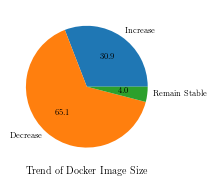

In [14]:
slope=dockerfiles['image_size'].apply(lambda x: get_slope(str2intlist(x)))
slope=slope.dropna()
inc=len(slope[slope>0])/len(slope)
dsc=len(slope[slope<0])/len(slope)
stb=1-inc-dsc
print('Proportion of Docker images whose size increases over time: ', inc)
print('Proportion of Docker images whose size decreases over time ', dsc)
print('Proportion of Docker images whose size remains stable over time: ', stb)
fig=plt.figure(figsize=(4,2.8))
ax=plt.subplot(111)
plt.pie([inc,dsc,stb],labels=['Increase','Decrease','Remain Stable'],autopct='%1.1f%%')
ax.set_xlabel('Trend of Docker Image Size')
fig.savefig(figs_dir+'pie-image-size', dpi=300)
fig.savefig(figs_dir+'pie-image-size.pdf')